<a href="https://colab.research.google.com/github/Weinihsiang/Pytorch/blob/main/RNN_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# This relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Load the dataset
We'll take advantage of pandas' built-in DatetimeIndex by passing parse_dates=True

In [ ]:
df = pd.read_csv('/content/Alcohol_Sales.csv',index_col=0,parse_dates=True)#grap the first comlumn and set that as index
len(df)

325

In [ ]:
df.columns#data is index now 3459 is string(object)

Index(['S4248SM144NCEN'], dtype='object')

In [ ]:
df = df.dropna()

In [ ]:
df

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<Axes: xlabel='DATE'>

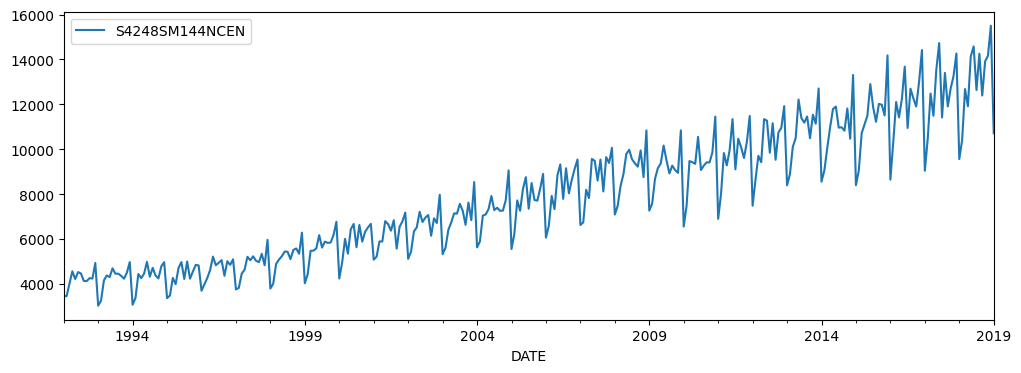

In [ ]:
df.plot(figsize=(12,4))

In [ ]:
y = df['S4248SM144NCEN'].values.astype(float)

In [ ]:
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [ ]:
test_size=12

In [ ]:
train_set = y[:-test_size]
test_set= y[-test_size:]

In [ ]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate a scaler with a feature range from -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
scaler

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
train_set.reshape(-1, 1)

array([[ 3459.],
       [ 3458.],
       [ 4002.],
       [ 4564.],
       [ 4221.],
       [ 4529.],
       [ 4466.],
       [ 4137.],
       [ 4126.],
       [ 4259.],
       [ 4240.],
       [ 4936.],
       [ 3031.],
       [ 3261.],
       [ 4160.],
       [ 4377.],
       [ 4307.],
       [ 4696.],
       [ 4458.],
       [ 4457.],
       [ 4364.],
       [ 4236.],
       [ 4500.],
       [ 4974.],
       [ 3075.],
       [ 3377.],
       [ 4443.],
       [ 4261.],
       [ 4460.],
       [ 4985.],
       [ 4324.],
       [ 4719.],
       [ 4374.],
       [ 4248.],
       [ 4784.],
       [ 4971.],
       [ 3370.],
       [ 3484.],
       [ 4269.],
       [ 3994.],
       [ 4715.],
       [ 4974.],
       [ 4223.],
       [ 5000.],
       [ 4235.],
       [ 4554.],
       [ 4851.],
       [ 4826.],
       [ 3699.],
       [ 3983.],
       [ 4262.],
       [ 4619.],
       [ 5219.],
       [ 4836.],
       [ 4941.],
       [ 5062.],
       [ 4365.],
       [ 5012.],
       [ 4850.

In [ ]:
# Normalize the training set
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

In [ ]:
"""
or
scaler.fit(train_set.reshape(-1,1))
train_norm = scaler.transform(train_set.reshape(-1, 1))
"""

'\nor \nscaler.fit(train_set.reshape(-1,1))\ntrain_norm = scaler.transform(train_set.reshape(-1, 1))\n'

In [ ]:
train_norm

array([[-0.92683135],
       [-0.92700231],
       [-0.83400291],
       [-0.73792632],
       [-0.79656381],
       [-0.74390974],
       [-0.75467989],
       [-0.81092401],
       [-0.81280451],
       [-0.79006753],
       [-0.79331567],
       [-0.67433114],
       [-1.        ],
       [-0.9606804 ],
       [-0.80699205],
       [-0.76989486],
       [-0.7818617 ],
       [-0.71536029],
       [-0.75604753],
       [-0.75621848],
       [-0.77211727],
       [-0.79399949],
       [-0.74886742],
       [-0.66783486],
       [-0.99247799],
       [-0.94084965],
       [-0.75861185],
       [-0.78972562],
       [-0.75570562],
       [-0.66595436],
       [-0.77895547],
       [-0.71142833],
       [-0.77040773],
       [-0.79194803],
       [-0.70031627],
       [-0.66834772],
       [-0.94204633],
       [-0.92255748],
       [-0.78835798],
       [-0.83537054],
       [-0.71211215],
       [-0.66783486],
       [-0.7962219 ],
       [-0.66339003],
       [-0.79417044],
       [-0

In [ ]:
#train_norm 325-12-12 = 301
#len(y) - test_size - window_size
train_norm = torch.FloatTensor(train_norm).view(-1)
train_norm, len(train_norm)

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607, -0.8070, -0.7699,
         -0.7819, -0.7154, -0.7560, -0.7562, -0.7721, -0.7940, -0.7489, -0.6678,
         -0.9925, -0.9408, -0.7586, -0.7897, -0.7557, -0.6660, -0.7790, -0.7114,
         -0.7704, -0.7919, -0.7003, -0.6683, -0.9420, -0.9226, -0.7884, -0.8354,
         -0.7121, -0.6678, -0.7962, -0.6634, -0.7942, -0.7396, -0.6889, -0.6931,
         -0.8858, -0.8373, -0.7896, -0.7285, -0.6260, -0.6914, -0.6735, -0.6528,
         -0.7719, -0.6613, -0.6890, -0.6468, -0.8757, -0.8643, -0.7567, -0.7258,
         -0.6275, -0.6536, -0.6239, -0.6576, -0.6685, -0.6049, -0.6923, -0.4984,
         -0.8692, -0.8311, -0.6808, -0.6480, -0.6229, -0.5870, -0.5890, -0.6451,
         -0.5753, -0.5637, -0.6042, -0.4435, -0.8289, -0.7600, -0.5815, -0.5808,
         -0.5630, -0.4623, -0.5572, -0.5114, -0.5218, -0.5182, -0.4617, -0.3606,
         -0.7928, -0.6716, -

In [ ]:
window_size = 12

In [ ]:
def input_data(seq,ws):
  out = []
  L = len(seq)

  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window,label))

  return out


In [ ]:
train_data = input_data(train_norm, window_size)

In [ ]:
len(train_data)

301

In [ ]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]),
 tensor([-1.]))

In [ ]:
(torch.zeros(1,1,2),
                       torch.zeros(1,1,2))

(tensor([[[0., 0.]]]), tensor([[[0., 0.]]]))

In [ ]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):#INPUT SIZE = HOW MANY DATA PER TIME STAMP
        super().__init__()
        self.hidden_size = hidden_size
        #WE ARE PASSING IN 3 THINGS(tuple)
        #X, (HIDDEN STATE, CELL STATE)

        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)

        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)



    def forward(self,seq):



        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value

NameError: ignored

In [ ]:
torch.manual_seed(101)
model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

count_parameters(model)

   400
 40000
   400
   400
   100
     1
______
 41301


In [ ]:
#100 *4
#100 *4 *100(hidden = 100)

In [ ]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):

    # extract the sequence & label from the training data
    for seq, y_train in train_data:

        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.25310203
Epoch:  2 Loss: 0.37531978
Epoch:  3 Loss: 0.39027259
Epoch:  4 Loss: 0.34934655
Epoch:  5 Loss: 0.33085671
Epoch:  6 Loss: 0.33229983
Epoch:  7 Loss: 0.32670361
Epoch:  8 Loss: 0.32074118
Epoch:  9 Loss: 0.30653548
Epoch: 10 Loss: 0.29518023
Epoch: 11 Loss: 0.26934317
Epoch: 12 Loss: 0.25998375
Epoch: 13 Loss: 0.24666046
Epoch: 14 Loss: 0.22404189
Epoch: 15 Loss: 0.18602459
Epoch: 16 Loss: 0.18561199
Epoch: 17 Loss: 0.17209312
Epoch: 18 Loss: 0.25159931
Epoch: 19 Loss: 0.22557171
Epoch: 20 Loss: 0.17443657
Epoch: 21 Loss: 0.20230764
Epoch: 22 Loss: 0.20833322
Epoch: 23 Loss: 0.16662095
Epoch: 24 Loss: 0.17570028
Epoch: 25 Loss: 0.11997764
Epoch: 26 Loss: 0.09056523
Epoch: 27 Loss: 0.03844085
Epoch: 28 Loss: 0.02648704
Epoch: 29 Loss: 0.01422587
Epoch: 30 Loss: 0.03786187
Epoch: 31 Loss: 0.00017620
Epoch: 32 Loss: 0.01731373
Epoch: 33 Loss: 0.05830109
Epoch: 34 Loss: 0.03435535
Epoch: 35 Loss: 0.02085024
Epoch: 36 Loss: 0.00044663
Epoch: 37 Loss: 0.00060406
E

In [ ]:
future = 12

# Add the last window of training values to the list of predictions
preds = train_norm[-window_size:].tolist()

# Set the model to evaluation mode
model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

In [ ]:
window_size,preds
#0.2687,  0.6155,  0.4463,
#          0.7974,  1.0000,  0.4335,  0.7730,  0.5174,  0.6548,  0.7489,  0.9205,
 #         0.1168]),

(12,
 [0.2686554491519928,
  0.6155226826667786,
  0.4462774693965912,
  0.7974185943603516,
  1.0,
  0.43345585465431213,
  0.772972047328949,
  0.5173946619033813,
  0.6548423171043396,
  0.7488674521446228,
  0.9205060005187988,
  0.11684759706258774,
  0.5330607891082764,
  0.6023405194282532,
  0.5014191269874573,
  0.8624929785728455,
  1.0818102359771729,
  0.33334243297576904,
  0.9701698422431946,
  0.44321614503860474,
  0.6424400210380554,
  0.863142192363739,
  0.878913938999176,
  0.16997219622135162])

In [ ]:
scaler

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
true_predictions

array([[11998.63908589],
       [12403.8908684 ],
       [11813.55118331],
       [13925.65267816],
       [15208.54897535],
       [10830.38656169],
       [14555.5084922 ],
       [11473.0928404 ],
       [12638.45290306],
       [13929.45025423],
       [14021.70708618],
       [ 9874.7523618 ]])

In [ ]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

In [ ]:
#add date time stamps
x = np.arange('2018-02-01','2019-02-01',dtype = 'datetime64[M]')#M = MONTH

In [ ]:
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

In [ ]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

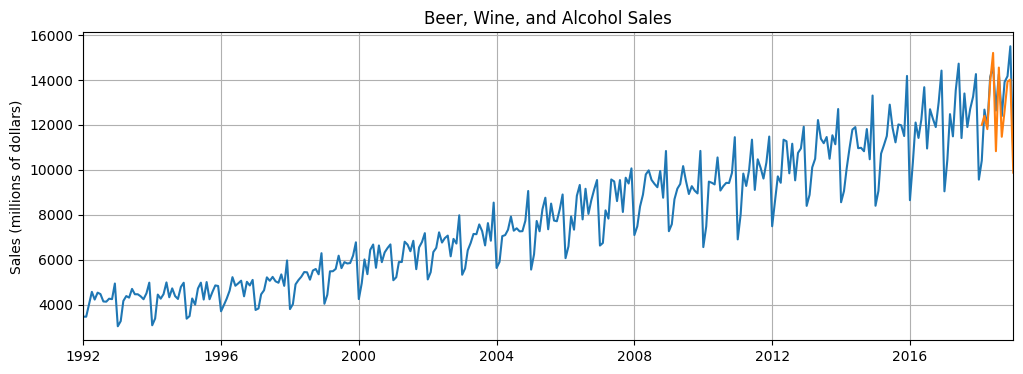

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

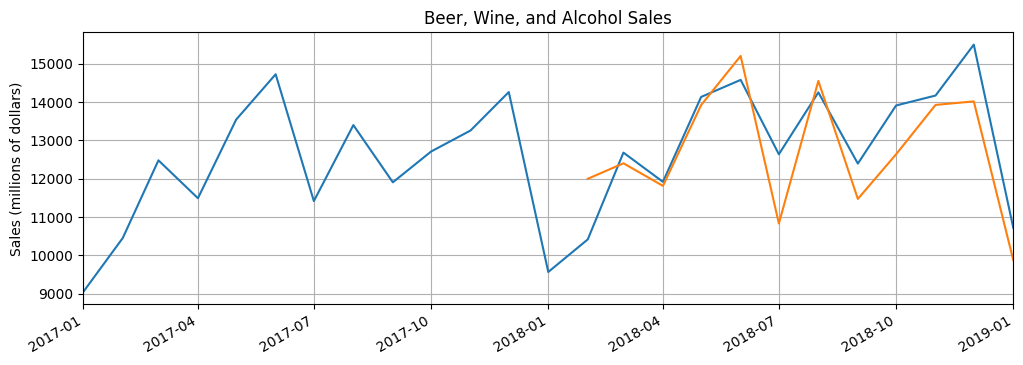

In [ ]:
# Plot the end of the graph
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

# Select the end of the graph with slice notation:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

In [ ]:
epochs = 100

# set model to back to training mode
model.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for epoch in range(epochs):

    # train on the full set of sequences
    for seq, y_train in all_data:

        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.02465338
Epoch:  2 Loss: 0.03046839
Epoch:  3 Loss: 0.02436688
Epoch:  4 Loss: 0.02021291
Epoch:  5 Loss: 0.02472188
Epoch:  6 Loss: 0.02683715
Epoch:  7 Loss: 0.02696704
Epoch:  8 Loss: 0.02601341
Epoch:  9 Loss: 0.02492432
Epoch: 10 Loss: 0.02167406
Epoch: 11 Loss: 0.01624472
Epoch: 12 Loss: 0.01607472
Epoch: 13 Loss: 0.01236303
Epoch: 14 Loss: 0.01347658
Epoch: 15 Loss: 0.01327168
Epoch: 16 Loss: 0.01118300
Epoch: 17 Loss: 0.01203307
Epoch: 18 Loss: 0.01868157
Epoch: 19 Loss: 0.00602668
Epoch: 20 Loss: 0.00293079
Epoch: 21 Loss: 0.00735735
Epoch: 22 Loss: 0.00233182
Epoch: 23 Loss: 0.00324678
Epoch: 24 Loss: 0.00962049
Epoch: 25 Loss: 0.00139367
Epoch: 26 Loss: 0.00050425
Epoch: 27 Loss: 0.00712850
Epoch: 28 Loss: 0.00269322
Epoch: 29 Loss: 0.00939288
Epoch: 30 Loss: 0.01226739
Epoch: 31 Loss: 0.00393321
Epoch: 32 Loss: 0.00407638
Epoch: 33 Loss: 0.00605394
Epoch: 34 Loss: 0.00841781
Epoch: 35 Loss: 0.00277591
Epoch: 36 Loss: 0.00606563
Epoch: 37 Loss: 0.00051775
E

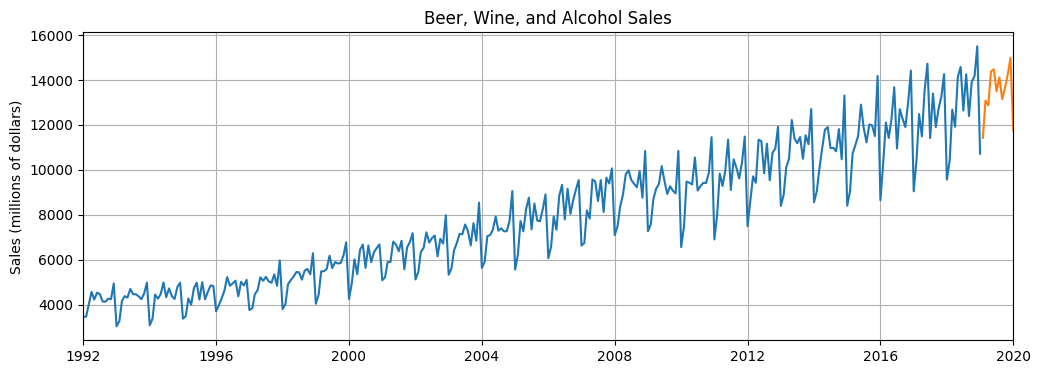

In [ ]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()
for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters here!
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

# Inverse-normalize the prediction set
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))

# PLOT THE RESULT
# Set a data range for the predicted data.
# Remember that the stop date has to be later than the last predicted value.
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')
#x = np.arange('2018-02-01','2019-02-01',dtype = 'datetime64[M]')#M = MONTH

plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

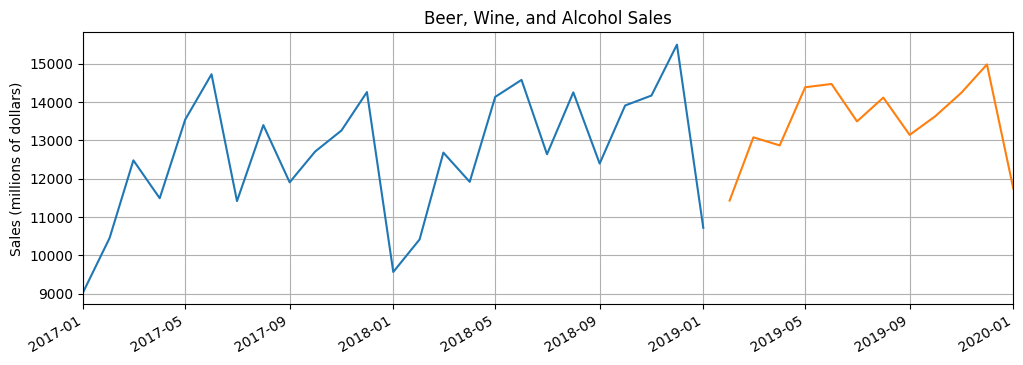

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.show()